In [1]:
import pandas as pd
df = pd.read_pickle('m10')
shift = 10

In [2]:
df.columns

Index(['t_DATE', 't_TIME', 't_SEC', 't_BID', 't_ASK', 't_LAST', 't_VOLUME',
       't_TYPE', 'iAC', 'iAD', 'iADX', 'iADXWilder', 'iAlligator', 'iAMA',
       'iAO', 'iATR', 'iBearsPower', 'iBands', 'iBullsPower', 'iCCI',
       'iChaikin', 'iDEMA', 'iDeMarker', 'iEnvelopes', 'iForce', 'iFractals',
       'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum', 'iMFI', 'iMA', 'iOsMA',
       'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI', 'iStdDEV', 'iStochastic',
       'iTEMA', 'iTriX', 'iWPR', 'iVIDyA', 'iVolumes', 't_DATE-TIME'],
      dtype='object')

In [3]:
df = df[['t_DATE', 't_TIME', 't_SEC', 't_BID', 't_ASK', 't_LAST','iCCI','iForce', 'iMFI', 'iRSI', 'iWPR']]

In [4]:
df.head(3)

,t_DATE,t_TIME,t_SEC,t_BID,t_ASK,t_LAST,iCCI,iForce,iMFI,iRSI,iWPR
0,2020.08.10,09:05,093,5423.5,5424.0,5423.5,7.299270,-10076.000000,36.427225,47.685062,-71.666667
1,2020.08.10,09:06,071,5421.5,5422.0,5421.5,-3.261123,-13456.807692,36.301022,46.551581,-78.333333
2,2020.08.10,09:07,030,5428.5,5429.0,5429.0,27.711797,-2072.615385,34.511246,51.107176,-53.333333


#### Volume 1

In [6]:
df['t_LAST_DELTA-10']= df['t_LAST']-df['t_LAST'].shift(shift)
df = df.dropna()

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mlt

Text(0, 0.5, 'iForce')

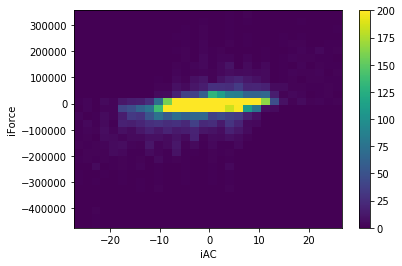

In [41]:
plt.hist2d(df['iAC'], df['iForce'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iAC')
plt.ylabel('iForce')

In [7]:
import numpy as np

In [42]:
v = df['iForce']
v_rad = df['iAC']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
#df=df.drop(columns=['iVolumes','iAC','t_VOLUME'])

(-437925.90759809426,
 352725.2326371046,
 -30333.802134363355,
 184883.83446162654)

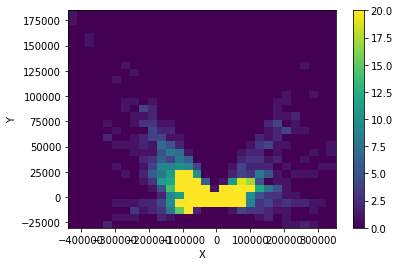

In [43]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.axis('tight')

#### Time

Transform time values in sin and cossine, witch is way better to model to interpret

In [5]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

0       2020-08-10 09:05:00
1       2020-08-10 09:06:00
2       2020-08-10 09:07:00
3       2020-08-10 09:08:00
4       2020-08-10 09:09:00
                ...        
12447   2020-09-18 17:45:00
12448   2020-09-18 17:46:00
12449   2020-09-18 17:47:00
12450   2020-09-18 17:48:00
12451   2020-09-18 17:49:00
Name: t_DATE-TIME, Length: 12452, dtype: datetime64[ns]

In [6]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

0        1.597061e+09
1        1.597061e+09
2        1.597061e+09
3        1.597061e+09
4        1.597061e+09
             ...     
12447    1.600462e+09
12448    1.600462e+09
12449    1.600462e+09
12450    1.600462e+09
12451    1.600462e+09
Name: t_DATE-TIME, Length: 12452, dtype: float64

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
day = 24*60*60
df['day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'time signal')

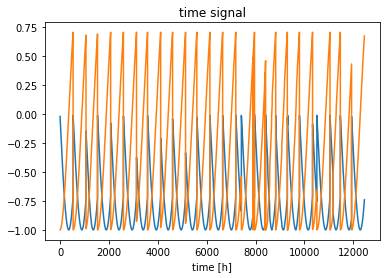

In [13]:
plt.plot(np.array(df['day sin'])[:])
plt.plot(np.array(df['day cos'])[:])
plt.xlabel('time [h]')
plt.title('time signal')

In [14]:
df

,t_BID,t_ASK,t_LAST,iCCI,iForce,iMFI,iRSI,iWPR,day sin,day cos
0,5423.5,5424.0,5423.5,7.299270,-10076.000000,36.427225,47.685062,-71.666667,-0.021815,-0.999762
1,5421.5,5422.0,5421.5,-3.261123,-13456.807692,36.301022,46.551581,-78.333333,-0.026177,-0.999657
2,5428.5,5429.0,5429.0,27.711797,-2072.615385,34.511246,51.107176,-53.333333,-0.030539,-0.999534
3,5425.0,5425.5,5425.0,11.460856,-11728.461538,33.590583,48.572070,-66.666667,-0.034899,-0.999391
4,5419.0,5419.5,5419.5,-23.956194,-28963.846154,32.290619,45.470734,-85.000000,-0.039260,-0.999229
...,...,...,...,...,...,...,...,...,...,...
12447,5393.0,5393.5,5393.0,143.123543,20660.538462,80.617453,80.265715,-5.504587,-0.751840,0.659346
12448,5393.5,5394.0,5393.5,143.965852,22134.615385,80.654554,80.416761,-4.587156,-0.748956,0.662620
12449,5393.5,5394.5,5393.5,143.965852,23534.615385,80.695416,80.416761,-4.587156,-0.746057,0.665882
12450,5391.5,5392.0,5391.5,140.584795,25259.076923,80.775864,79.798263,-8.256881,-0.743145,0.669131


In [15]:
df['iRSI']

0        47.685062
1        46.551581
2        51.107176
3        48.572070
4        45.470734
           ...    
12447    80.265715
12448    80.416761
12449    80.416761
12450    79.798263
12451    79.798263
Name: iRSI, Length: 12452, dtype: float64

In [16]:
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 'iCCI', 'iForce', 'iMFI', 'iRSI', 'iWPR',
       'day sin', 'day cos'],
      dtype='object')

In [17]:
df['t_BID'].describe()

count    12452.000000
mean      5429.387086
std        115.168433
min       5214.000000
25%       5331.000000
50%       5410.500000
75%       5527.500000
max       5901.500000
Name: t_BID, dtype: float64

In [18]:
features_list = ['iMFI','iWPR','iCCI','iRSI','iWPR','up','const','down']
#df['Vol_slope'] = df['Vy'] / df['Vx']
#df['Vol_slope'] = np.arctan(df['Vol_slope'])
#df['t_LAST'] = df['t_LAST'] - df['iVIDyA']
#df['iOsMA'] = df['iOsMA'] / abs(df['iOsMA'])
df['iMFI'] = [1 if x > 80 else -1 if x < 20 else 0 for x in df['iMFI']]
df['iWPR'] = [1 if x > -20 else -1 if x < -80 else 0 for x in df['iWPR']]
df['iCCI'] = [1 if x > 100 else -1 if x < -100 else 0 for x in df['iCCI']]
df['iRSI'] = [1 if x > 70 else -1 if x < 30 else 0 for x in df['iRSI']]
df['iWPR'] = [1 if x > -20 else -1 if x < -80 else 0 for x in df['iWPR']]
df['t_LAST_DELTA'] = df['t_LAST'].shift(-shift) - df['t_LAST']
df = df.dropna()
df['up'] = [1 if x >= 6 else 0 for x in df['t_LAST_DELTA']]
df['const'] = [1 if -6 <= x < 6 else 0 for x in df['t_LAST_DELTA']]
df['down'] = [1 if x < -6 else 0 for x in df['t_LAST_DELTA']]
#df['Vx'] = df['Vx'] / 1000
#df['Vy'] = df['Vy'] / 1000

#df['t_LAST_DELTA-10'] = df['t_LAST'] - df['t_LAST'].shift(10)
#df['t_LAST_DELTA-5'] = df['t_LAST'] - df['t_LAST'].shift(5)
bkp=df
df = df[features_list]
df.set_index(np.arange(len(df)))
df

C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,iMFI,iWPR,iCCI,iRSI,iWPR,up,const,down
0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
12437,0,1,1,1,1,0,1,0
12438,0,1,1,1,1,0,1,0
12439,0,1,1,1,1,0,1,0
12440,0,1,1,1,1,0,1,0


In [19]:
bkp.describe()

,t_BID,t_ASK,t_LAST,iCCI,iForce,iMFI,iRSI,iWPR,day sin,day cos,t_LAST_DELTA,up,const,down
count,12442.000000,12442.000000,12442.000000,12442.000000,12442.000000,12442.000000,12442.000000,12442.0,1.244200e+04,12442.000000,12442.000000,12442.000000,12442.000000,12442.000000
mean,5429.417136,5429.555417,5429.474361,-0.020013,-4816.842707,-0.017521,-0.014387,1.0,-7.301605e-01,-0.308650,-0.023549,0.199727,0.630445,0.169828
std,115.209821,115.113455,114.957686,0.634968,44567.669313,0.293292,0.404582,0.0,2.763152e-01,0.543397,9.356706,0.399811,0.482704,0.375497
min,5214.000000,4991.000000,5214.500000,-1.000000,-475353.692308,-1.000000,-1.000000,1.0,-1.000000e+00,-1.000000,-68.500000,0.000000,0.000000,0.000000
25%,5331.000000,5331.500000,5331.000000,0.000000,-11435.682692,0.000000,0.000000,1.0,-9.575714e-01,-0.829038,-4.000000,0.000000,0.000000,0.000000
50%,5410.500000,5411.000000,5410.500000,0.000000,-3.230769,0.000000,0.000000,1.0,-8.338858e-01,-0.394744,0.000000,0.000000,1.000000,0.000000
75%,5527.500000,5527.375000,5527.000000,0.000000,5861.509616,0.000000,0.000000,1.0,-5.591929e-01,0.177944,4.500000,0.000000,1.000000,0.000000
max,5901.500000,5674.000000,5674.000000,1.000000,356382.384615,1.000000,1.000000,1.0,1.169150e-11,0.704015,87.500000,1.000000,1.000000,1.000000


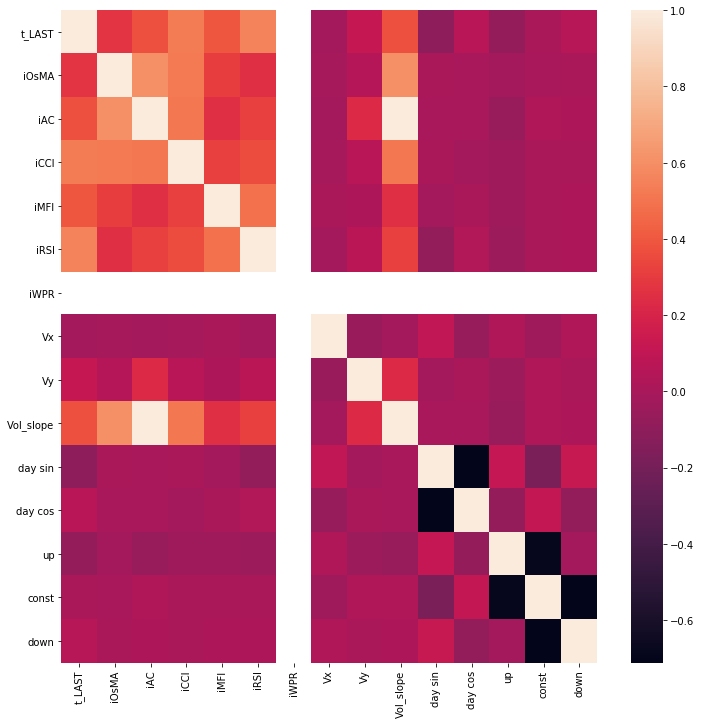

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

#sns.pairplot(df)

plt.figure(figsize=(12,12))
sn.heatmap(df.corr()) # , annot = True
plt.show()

In [20]:
indexes = df[df['const']==1].index
random_indexes = np.random.choice(indexes, 6000, replace=False)
df = df.drop(random_indexes)

In [21]:
df[df['const']==1]

,iMFI,iWPR,iCCI,iRSI,iWPR,up,const,down
0,0,1,0,0,1,0,1,0
8,0,1,0,0,1,0,1,0
14,0,1,-1,0,1,0,1,0
15,0,1,0,0,1,0,1,0
45,-1,1,-1,-1,1,0,1,0
...,...,...,...,...,...,...,...,...
12414,0,1,1,1,1,0,1,0
12416,0,1,1,1,1,0,1,0
12428,0,1,1,1,1,0,1,0
12432,0,1,1,1,1,0,1,0


In [60]:
df = df.dropna()

In [17]:
df

,iMFI,iWPR,iCCI,iRSI,iWPR,up,const,down
10,0,1,0,0,1,0,1,0
11,0,1,-1,0,1,1,0,0
12,0,1,-1,0,1,1,0,0
13,0,1,-1,0,1,0,1,0
14,0,1,-1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
12437,0,1,1,1,1,0,1,0
12438,0,1,1,1,1,0,1,0
12439,0,1,1,1,1,0,1,0
12440,0,1,1,1,1,0,1,0


In [62]:
df.iloc[:,-3:]

,up,const,down
10,0,1,0
11,1,0,0
12,1,0,0
13,0,1,0
14,0,1,0
...,...,...,...
12427,0,1,0
12429,0,1,0
12433,0,1,0
12434,0,1,0


In [22]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [23]:
X_train, X_val, y_train, y_val = train_df.iloc[:,:-3], val_df.iloc[:,:-3], train_df.iloc[:,-3:], val_df.iloc[:,-3:]

In [103]:
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

In [24]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4509, 5) (1288, 5) (4509, 3) (1288, 3)


In [27]:
X_train.shape

(3042, 9)

In [265]:
len(test_df)*0.53

51.940000000000005

In [266]:
len(test_df[test_df['const']==1])

52

In [140]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)

In [25]:
import tensorflow as tf

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
def scheduler(epoch, lr):
  if epoch < 150:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def weights_cal_and_fit(sequencial,X_train, y_train,validation_data, w_cal, w_epochs, MAX_EPOCHS):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
    
        model_loss=np.zeros(w_cal)
        weights_holder=[]
        for i in range(w_cal):
            model=sequencial
            model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9),metrics=["accuracy"])
            temp_history = model.fit(X_train, y_train, epochs=w_epochs,validation_data=validation_data,verbose=0)
            model_loss.put(i, temp_history.history['accuracy'][-1])
            weights_holder.append(model)
        model=weights_holder[np.argmax(model_loss)]
        history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72,validation_data=validation_data)
        return history, model

In [30]:
from tensorflow import keras
METRICS = []

Instantiate and evaluate this model:

## BASELINE

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.L1(0.008),activity_regularizer=tf.keras.regularizers.L2(0.08)),
    tf.keras.layers.Dense(3, activation='softmax'),
])
#optimizer=keras.optimizers.Adam(lr=1e-3),
optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
my_callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)
my_callback2 = myCallback()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 16)          3136      
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 16)         

In [48]:
%%time
MAX_EPOCHS=120
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/120
63/63 - 5s - loss: 1.4799 - accuracy: 0.3759 - val_loss: 1.4194 - val_accuracy: 0.3626
Epoch 2/120
63/63 - 2s - loss: 1.3665 - accuracy: 0.3894 - val_loss: 1.3186 - val_accuracy: 0.3626
Epoch 3/120
63/63 - 2s - loss: 1.2748 - accuracy: 0.3894 - val_loss: 1.2382 - val_accuracy: 0.3626
Epoch 4/120
63/63 - 2s - loss: 1.2034 - accuracy: 0.3894 - val_loss: 1.1757 - val_accuracy: 0.3626
Epoch 5/120
63/63 - 2s - loss: 1.1476 - accuracy: 0.3894 - val_loss: 1.1282 - val_accuracy: 0.3626
Epoch 6/120
63/63 - 2s - loss: 1.1096 - accuracy: 0.3894 - val_loss: 1.1015 - val_accuracy: 0.3626
Epoch 7/120
63/63 - 2s - loss: 1.0930 - accuracy: 0.3894 - val_loss: 1.0950 - val_accuracy: 0.3626
Epoch 8/120
63/63 - 2s - loss: 1.0909 - accuracy: 0.3894 - val_loss: 1.0949 - val_accuracy: 0.3626
Epoch 9/120
63/63 - 2s - loss: 1.0907 - accuracy: 0.3894 - val_loss: 1.0949 - val_accuracy: 0.3626
Epoch 10/120
63/63 - 2s - loss: 1.0907 - accuracy: 0.3894 - val_loss: 1.0949 - val_accuracy: 0.3626
Epoch 11/

KeyboardInterrupt: 

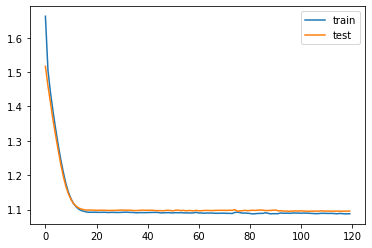

In [49]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [40]:
X_test, y_test = test_df.iloc[:,:-3], test_df.iloc[:,-3:]
#X_test = scaler.transform(X_test)

In [41]:
predict=model.predict(X_test)

In [190]:
predict=xgb_preds

In [ ]:
predict

In [42]:
y_test_v = y_test.values

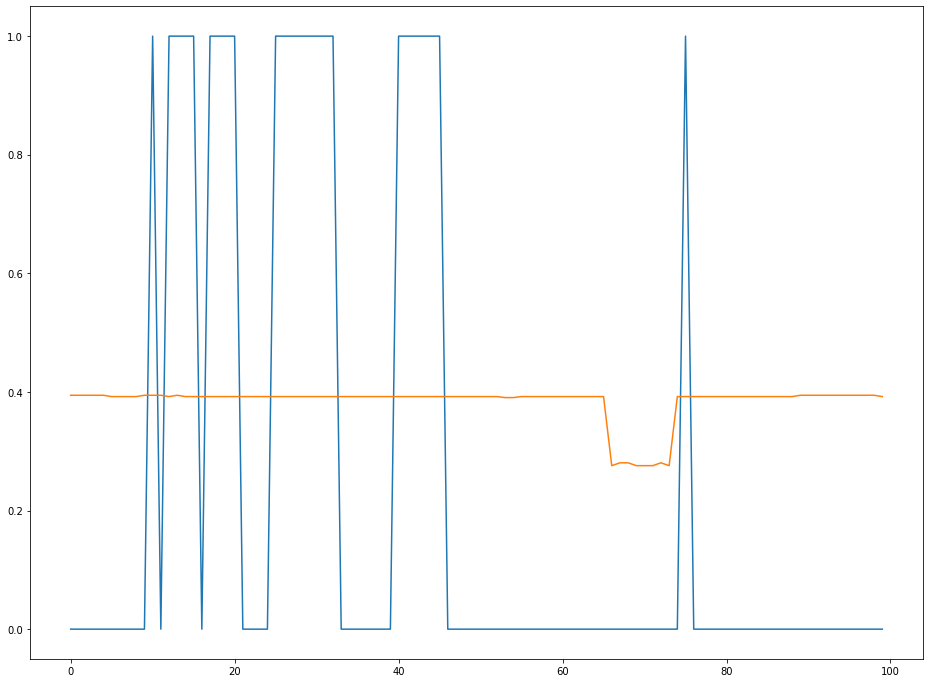

In [43]:
start=0
end=100
plt.figure(figsize = (16, 12))
plt.plot(np.arange(len(y_test))[start:end], [x[0] for x in y_test_v[start:end]])
plt.plot(np.arange(len(predict))[start:end], [x[0] for x in predict[start:end]])
plt.show()

In [36]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 5ms/step - loss: 1.1581 - accuracy: 0.3563


[1.1581255197525024, 0.3563218414783478]

In [33]:
model.save('models/RNN_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/RNN_model\assets


In [17]:
loaded_model = tf.keras.models.load_model('models/RNN_model')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1088      
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
______________________________________________________

In [18]:
model = loaded_model

In [19]:
import thread_main_loop as tml

In [20]:
t1 = tml.thread_main_loop(model, "0", "1", scaler)
t1.start()

#########
t_BID      5533.000000
t_ASK      5533.500000
t_LAST     5533.500000
Vx        -2733.196299
Vy        -7077.584827
day sin      -0.477159
day cos      -0.878817
Name: 0, dtype: float64
#########


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Henrique\Workspace\jupyter_workspace\my_advisor\thread_main_loop.py", line 115, in run
    last_row = self.scaler.transform(last_row)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py", line 794, in transform
    force_all_finite='allow-nan')
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 436, in _validate_data
    self._check_n_features(X, reset=reset)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 380, in _check_n_features
    self.n_features_in_)
ValueError: X has 7 features, but this StandardScaler is expecting 8 features as input.



In [6]:
t1.kill()

In [25]:
import tensorflow as tf

In [56]:
from tensorflow import keras
METRICS = [
    tf.keras.metrics.MeanSquaredLogarithmicError(
    name='mean_squared_logarithmic_error', dtype=None
    )
]

In [68]:
output_bias = y_train.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dense(3, use_bias=False, activation='softmax')
])

In [69]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
      optimizer=optimizer,
      loss='mae',
      metrics='accuracy')

In [70]:
%%time
MAX_EPOCHS=200
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False, )

Epoch 1/200
10/10 - 0s - loss: 0.6614 - accuracy: 0.3675 - val_loss: 0.6223 - val_accuracy: 0.4133
Epoch 2/200
10/10 - 0s - loss: 0.6290 - accuracy: 0.3616 - val_loss: 0.6068 - val_accuracy: 0.4388
Epoch 3/200
10/10 - 0s - loss: 0.6108 - accuracy: 0.3895 - val_loss: 0.5944 - val_accuracy: 0.4490
Epoch 4/200
10/10 - 0s - loss: 0.5970 - accuracy: 0.4261 - val_loss: 0.5850 - val_accuracy: 0.4745
Epoch 5/200
10/10 - 0s - loss: 0.5875 - accuracy: 0.4217 - val_loss: 0.5748 - val_accuracy: 0.4745
Epoch 6/200
10/10 - 0s - loss: 0.5787 - accuracy: 0.4392 - val_loss: 0.5666 - val_accuracy: 0.4898
Epoch 7/200
10/10 - 0s - loss: 0.5681 - accuracy: 0.4568 - val_loss: 0.5578 - val_accuracy: 0.4796
Epoch 8/200
10/10 - 0s - loss: 0.5599 - accuracy: 0.4451 - val_loss: 0.5501 - val_accuracy: 0.4592
Epoch 9/200
10/10 - 0s - loss: 0.5503 - accuracy: 0.4597 - val_loss: 0.5426 - val_accuracy: 0.4541
Epoch 10/200
10/10 - 0s - loss: 0.5440 - accuracy: 0.4729 - val_loss: 0.5336 - val_accuracy: 0.4694
Epoch 11/

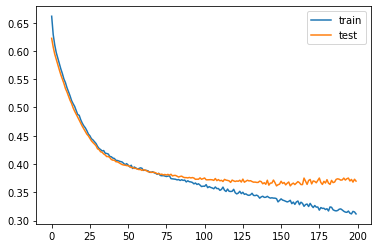

In [71]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [171]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04)),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mae', optimizer=optimizer,metrics=['mse'])

In [176]:
output_bias = y_val.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [177]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
            optimizer=optimizer,
            metrics=['mse'])

In [178]:
%%time
MAX_EPOCHS=1000
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/1000
127/127 - 0s - loss: 1.7617 - mse: 174.1155 - val_loss: 1.4713 - val_mse: 73.6075
Epoch 2/1000
127/127 - 0s - loss: 1.5301 - mse: 69.5610 - val_loss: 0.9271 - val_mse: 9.4659
Epoch 3/1000
127/127 - 0s - loss: 1.5350 - mse: 86.9822 - val_loss: 1.3561 - val_mse: 56.8691
Epoch 4/1000
127/127 - 0s - loss: 1.5316 - mse: 80.4469 - val_loss: 1.2986 - val_mse: 48.3124
Epoch 5/1000
127/127 - 0s - loss: 1.5278 - mse: 75.5769 - val_loss: 0.9273 - val_mse: 7.9247
Epoch 6/1000
127/127 - 0s - loss: 1.4761 - mse: 70.1307 - val_loss: 0.9110 - val_mse: 7.0763
Epoch 7/1000
127/127 - 0s - loss: 1.5269 - mse: 84.8447 - val_loss: 0.8457 - val_mse: 4.0439
Epoch 8/1000
127/127 - 0s - loss: 1.5070 - mse: 83.4574 - val_loss: 1.4844 - val_mse: 76.2460
Epoch 9/1000
127/127 - 0s - loss: 1.5204 - mse: 76.3069 - val_loss: 1.2665 - val_mse: 43.7213
Epoch 10/1000
127/127 - 0s - loss: 1.5092 - mse: 71.3656 - val_loss: 1.3648 - val_mse: 58.7042
Epoch 11/1000
127/127 - 0s - loss: 1.5069 - mse: 83.9818 - val

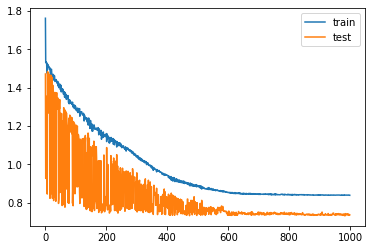

In [179]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [184]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val, y_val)

0.27324252432753093

In [78]:
reg.coef_

array([-3.41740997e-01, -1.59658539e-05, -2.61686849e+00,  5.55370155e-01,
       -2.56612481e-01, -3.12743492e-01])

In [79]:
reg.intercept_

-0.1852887209351371

In [80]:
predict = reg.predict(X_val)

In [81]:
for i in range(len(predict)):
    predict[i] = abs(predict[i])

In [82]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, predict)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [185]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(n_estimators=3000, learning_rate=0.003, random_state=0)

xgb_model.fit(X_train, y_train, verbose=True)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, xgb_preds))

MAE: 0.7419351629106508


In [84]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, xgb_preds)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [186]:
hp_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.002, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=2, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=2, verbosity=None)


hp_model.fit(X_train, y_train, verbose=True)

hp_preds = hp_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, hp_preds))

MAE: 0.756663040946303


In [86]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, hp_preds)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [87]:
np.any(np.isnan(test))

NameError: name 'test' is not defined

In [88]:
from numpy import *
where_are_NaNs = isnan(test)
test[where_are_NaNs] = 0

NameError: name 'test' is not defined

In [ ]:
np.all(np.isfinite(test))

In [ ]:
test_predict=reg.predict(test)
submission['SalePrice']=test_predict

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)